<a href="https://colab.research.google.com/github/friendship-jung/CodingTest_Practice/blob/main/%EC%A0%84%EA%B8%B0%EC%B0%A8_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1_%ED%95%B4%EC%BB%A4%ED%86%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [ ]:
! git clone https://github.com/friendship-jung/EVPriceEstimator.git

fatal: destination path 'EVPriceEstimator' already exists and is not an empty directory.


In [ ]:
!git add .
!git commit -m "https://github.com/friendship-jung/EVPriceEstimator"
!git push origin main


fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [11]:
# 데이터시각화를 위한 폰트설정
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                           # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 124565 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


# 데이터 확인

In [ ]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/전기차 가격 예측 해커톤/train.csv")
train

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02
...,...,...,...,...,...,...,...,...,...,...,...
7492,TRAIN_7492,H사,ION5,Brand New,NaN,AWD,3773,10,No,0,35.95
7493,TRAIN_7493,B사,i3,Pre-Owned,46.000,RWD,135411,2,No,0,23.40
7494,TRAIN_7494,P사,TayCT,Brand New,NaN,AWD,1363,2,No,0,120.00
7495,TRAIN_7495,B사,i3,Nearly New,56.000,RWD,39445,6,No,2,24.00


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


In [ ]:
train['차량상태'].value_counts()

,count
차량상태,
Brand New,3380
Nearly New,2059
Pre-Owned,2058


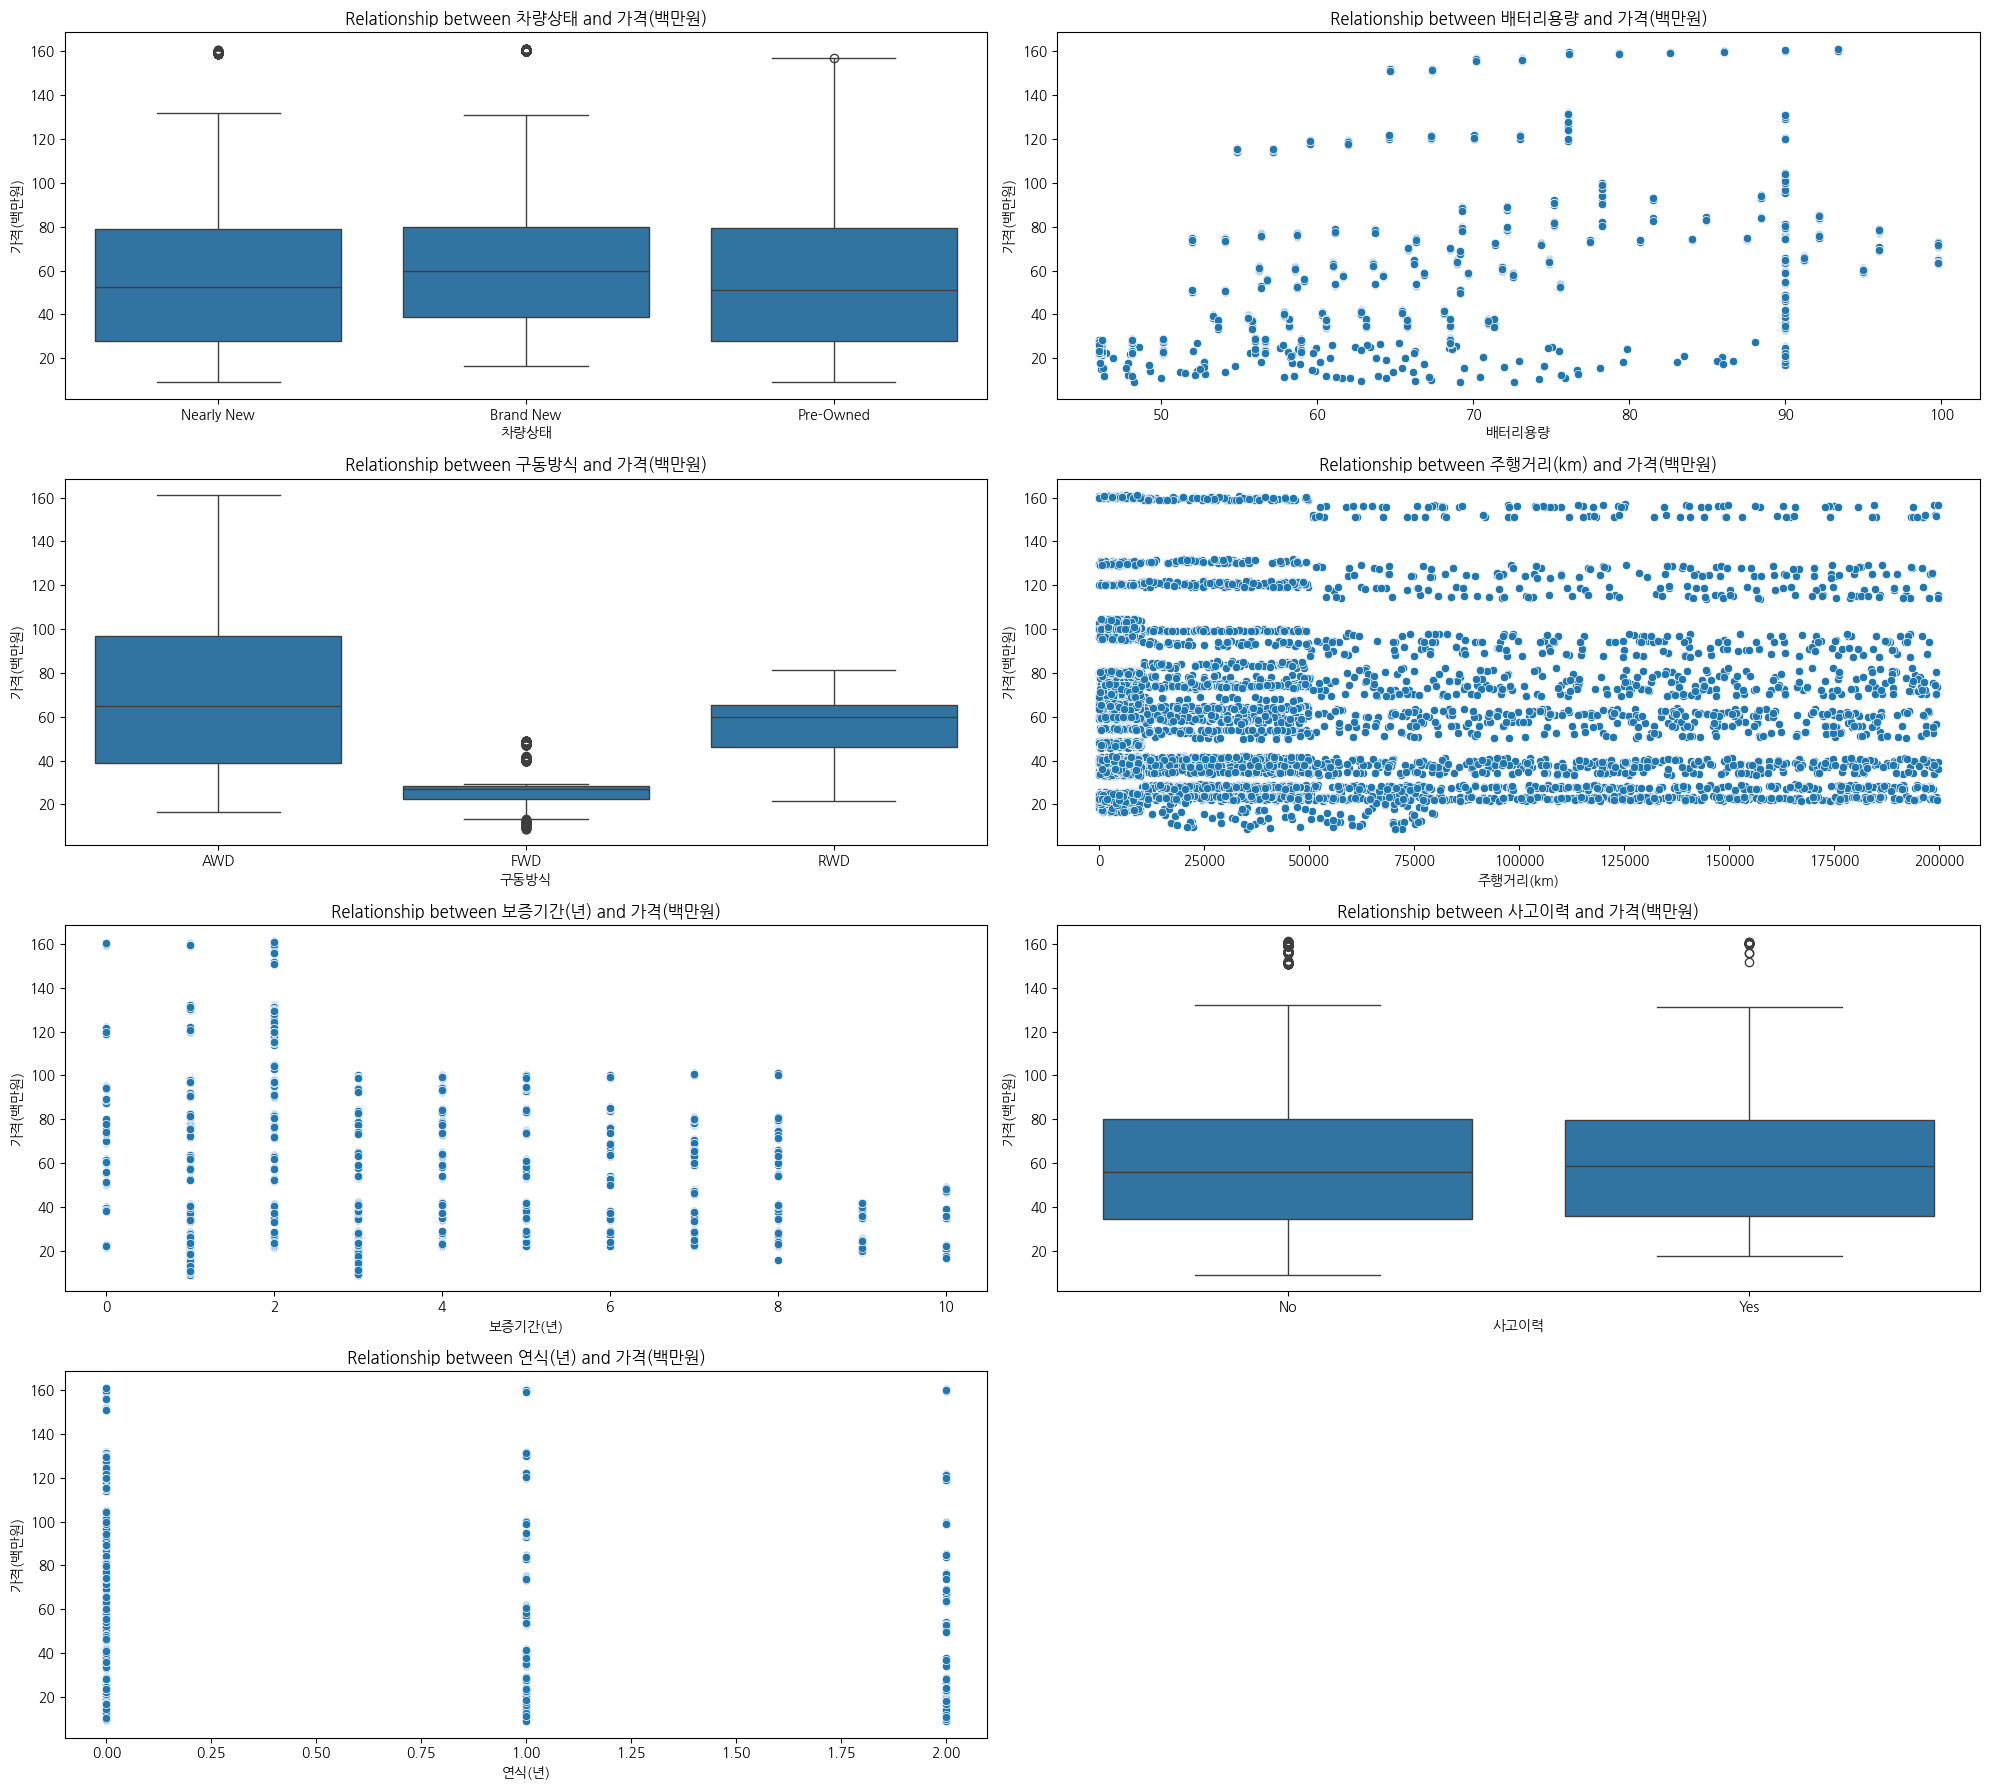

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure size and grid for multiple plots
plt.figure(figsize=(20, 18))

# List of columns to plot against price
columns_to_plot = ['차량상태', '배터리용량', '구동방식', '주행거리(km)', '보증기간(년)', '사고이력', '연식(년)']
n = 1  # Starting subplot index

# Loop through each column and create a plot
for column in columns_to_plot:
    plt.subplot(4, 2, n)
    if train[column].dtype == 'object' or column == '차량상태':
        # If categorical, use boxplot
        sns.boxplot(x=column, y='가격(백만원)', data=train)
    else:
        # If numerical, use scatterplot
        sns.scatterplot(x=column, y='가격(백만원)', data=train)

    plt.title(f'Relationship between {column} and 가격(백만원)')
    plt.xlabel(column)
    plt.ylabel('가격(백만원)')
    n += 1

# Adjust layout
plt.tight_layout()
plt.show()


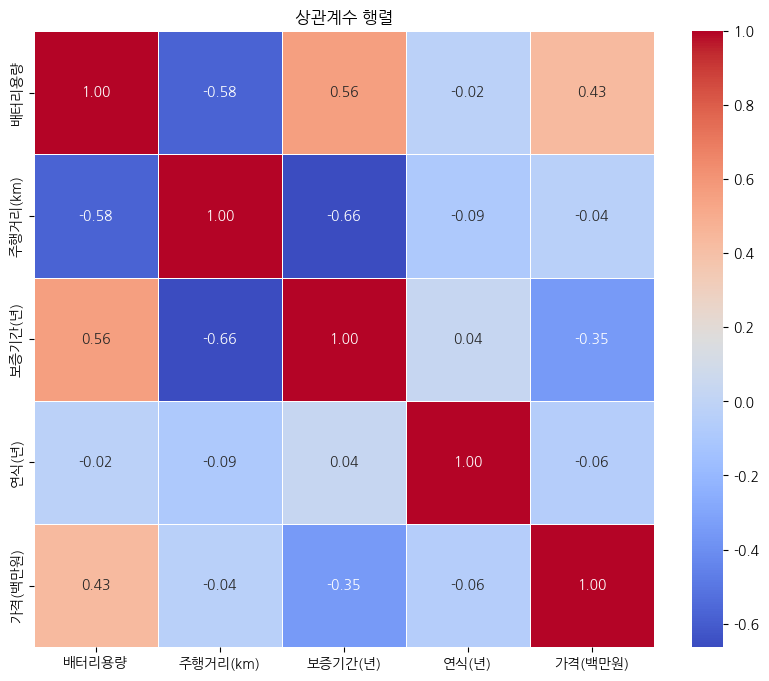

In [19]:
# 상관계수 행렬 계산
correlation_matrix = train[['배터리용량','주행거리(km)', '보증기간(년)','연식(년)', '가격(백만원)']].corr()

# 상관계수 행렬을 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('상관계수 행렬')
plt.show()


In [23]:
# 범주형 변수와 가격 변수의 상관 관계를 계산하기 위해, 각 범주형 변수를 수치형으로 변환
from scipy.stats import pointbiserialr

# 범주형 변수를 숫자형으로 인코딩
train['차량상태_code'] = train['차량상태'].astype('category').cat.codes
train['구동방식_code'] = train['구동방식'].astype('category').cat.codes
train['사고이력_code'] = train['사고이력'].astype('category').cat.codes

# 각 범주형 변수와 가격(백만원)과의 상관관계 계산
correlation_vehicle_condition = pointbiserialr(train['차량상태_code'], train['가격(백만원)']).correlation
correlation_drive_type = pointbiserialr(train['구동방식_code'], train['가격(백만원)']).correlation
correlation_accident_history = pointbiserialr(train['사고이력_code'], train['가격(백만원)']).correlation

correlation_vehicle_condition, correlation_drive_type, correlation_accident_history


(-0.06501926677125228, -0.29755390476185406, 0.004626857744401438)

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/전기차 가격 예측 해커톤/test.csv")
test

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,TEST_000,P사,TayCT,Nearly New,76.093,AWD,14057,2,No,0
1,TEST_001,B사,iX,Brand New,90.000,AWD,7547,8,No,0
2,TEST_002,B사,i5,Brand New,NaN,RWD,7197,7,Yes,0
3,TEST_003,H사,ION5,Nearly New,68.479,AWD,10357,7,No,1
4,TEST_004,K사,EV6,Brand New,NaN,FWD,7597,10,No,0
...,...,...,...,...,...,...,...,...,...,...
841,TEST_841,P사,TayGTS,Pre-Owned,64.683,AWD,117298,2,No,0
842,TEST_842,V사,ID4,Pre-Owned,55.547,AWD,72308,0,No,0
843,TEST_843,V사,ID4,Pre-Owned,55.547,AWD,124537,0,No,0
844,TEST_844,A사,Q4eT,Nearly New,69.646,AWD,15629,4,No,0


# 데이터 전처리

# 모델 학습 코드

In [24]:
# train.csv, test.csv 파일 로드
train = pd.read_csv('/content/drive/MyDrive/전기차 가격 예측 해커톤/train.csv')
test = pd.read_csv('/content/drive/MyDrive/전기차 가격 예측 해커톤/test.csv')

# 범주형 데이터 원-핫 인코딩
categorical_features = ['제조사', '모델', '차량상태', '구동방식', '사고이력']
train_encoded = pd.get_dummies(train, columns=categorical_features)
test_encoded = pd.get_dummies(test, columns=categorical_features)

# 배터리용량 누락 값 처리 - 중앙값으로 대체
battery_median = train_encoded['배터리용량'].median()
train_encoded['배터리용량'].fillna(battery_median, inplace=True)
test_encoded['배터리용량'].fillna(battery_median, inplace=True)

# 훈련 데이터와 테스트 데이터의 컬럼 일치화
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

# 확인
train_encoded.info(), test_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7497 non-null   object 
 1   배터리용량            7497 non-null   float64
 2   주행거리(km)         7497 non-null   int64  
 3   보증기간(년)          7497 non-null   int64  
 4   연식(년)            7497 non-null   int64  
 5   가격(백만원)          7497 non-null   float64
 6   제조사_A사           7497 non-null   bool   
 7   제조사_B사           7497 non-null   bool   
 8   제조사_H사           7497 non-null   bool   
 9   제조사_K사           7497 non-null   bool   
 10  제조사_P사           7497 non-null   bool   
 11  제조사_T사           7497 non-null   bool   
 12  제조사_V사           7497 non-null   bool   
 13  모델_EV6           7497 non-null   bool   
 14  모델_ID4           7497 non-null   bool   
 15  모델_ION5          7497 non-null   bool   
 16  모델_ION6          7497 non-null   bool   
 17  모델_IONIQ      

<ipython-input-24-f496a3667f04>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_encoded['배터리용량'].fillna(battery_median, inplace=True)
<ipython-input-24-f496a3667f04>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

(None, None)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 특성과 타겟 변수 분리
X = train_encoded.drop(columns=['ID', '가격(백만원)'])
y = train_encoded['가격(백만원)']

# 훈련 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
y_pred = model.predict(X_val)

# 모델 평가
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

rmse, r2


(3.6583263989601464, 0.9902595534302098)

In [26]:
# 테스트 데이터셋에서 예측
X_test = test_encoded.drop(columns=['ID', '가격(백만원)'])
test_encoded['가격(백만원)'] = model.predict(X_test)

# 예측 결과를 sample_submission.csv 형식에 맞게 조정
submission = pd.DataFrame({
    'ID': test_encoded['ID'],
    '가격(백만원)': test_encoded['가격(백만원)']
})

# 결과 확인
submission.head()


,ID,가격(백만원)
0,TEST_000,129.156993
1,TEST_001,78.556575
2,TEST_002,60.938612
3,TEST_003,37.067077
4,TEST_004,44.724726


In [28]:
# submission 파일 CSV 형식으로 저장
submission_file_path = '/content/electric_vehicle_price_predictions.csv'
submission.to_csv(submission_file_path, index=False)

submission_file_path


'/content/electric_vehicle_price_predictions.csv'